# Statistical analysis into Darwin's Finches Birds Evolution

As an aspiring data scientist I've been following courses on DataCamp and have repeated some of the exercises on statistical learning below. The dataset is taken from Kaggle (available here: https://www.kaggle.com/crbelhekar619/darwins-finches-evolution-dataset?select=scandens_beak_depth_heredity.csv)   

As a context, Finches are a group of birds that Darwin was observing on Galapagos islands. They are well known for their diversity in beak sizes. The dataset provides with beak depth and length measurements for year 1975 and year 2012. 

My goal is to consolidate what I've learnt, put theory into (python) practice by statistically analysing the dataset of Finches beaks and visualise the insight to the audience.

### Part 1: Importing and getting the data ready

In [3]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os

After downloading two dataset from Kaggle - finch_beaks_1975 and finch_beaks_2012, I pre-merged them in excel, before importing it into the notebook.

In [4]:
df=pd.read_csv("Data/finch_beaks_1975_2012.csv") 

In [5]:
df.info() #check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             651 non-null    int64  
 1   species          651 non-null    object 
 2   Beak length, mm  651 non-null    float64
 3   Beak depth, mm   651 non-null    float64
 4   year             651 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 25.6+ KB


The dataset is complete in a sense where there is no missing or null values in any column.

In [6]:
df.head() #show the first 5 rows of the dataset

,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


There are 5 different columns. For the ease of data manupulation, "Beak length, mm" and "Beak depth, mm" will be renamed into somethihg shorter.

In [7]:
df_2= df.rename(columns={"Beak length, mm": "beak_length", "Beak depth, mm" : "beak_depth"}) #rename the beak-columns and assign to a new dataframe

In [8]:
df_2.head() #display the renamed beak-columns

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


Displaying the first 5 rows again  to show the renamed columns.

In [9]:
df_2=df_2.reset_index().rename(columns={df_2.index.name:'index_column'}) #convert index into a column to serve as a key attribute

In [10]:
df_2.head() #show the new index column

,index,band,species,beak_length,beak_depth,year
0,0,2,fortis,9.4,8.0,1975
1,1,9,fortis,9.2,8.3,1975
2,2,12,fortis,9.5,7.5,1975
3,3,15,fortis,9.5,8.0,1975
4,4,305,fortis,11.5,9.9,1975


Index has been convereted to a column to potentially serve as a key data attribute.

### Part 2: EDA (Exploratory Data Analysis) on beak depths of fortis species birds

#### 2.1 Image of how beak depth is measured

This image shows how the beak length and depth are measured - the EDA will focus on the beak depth (right side of the picture).


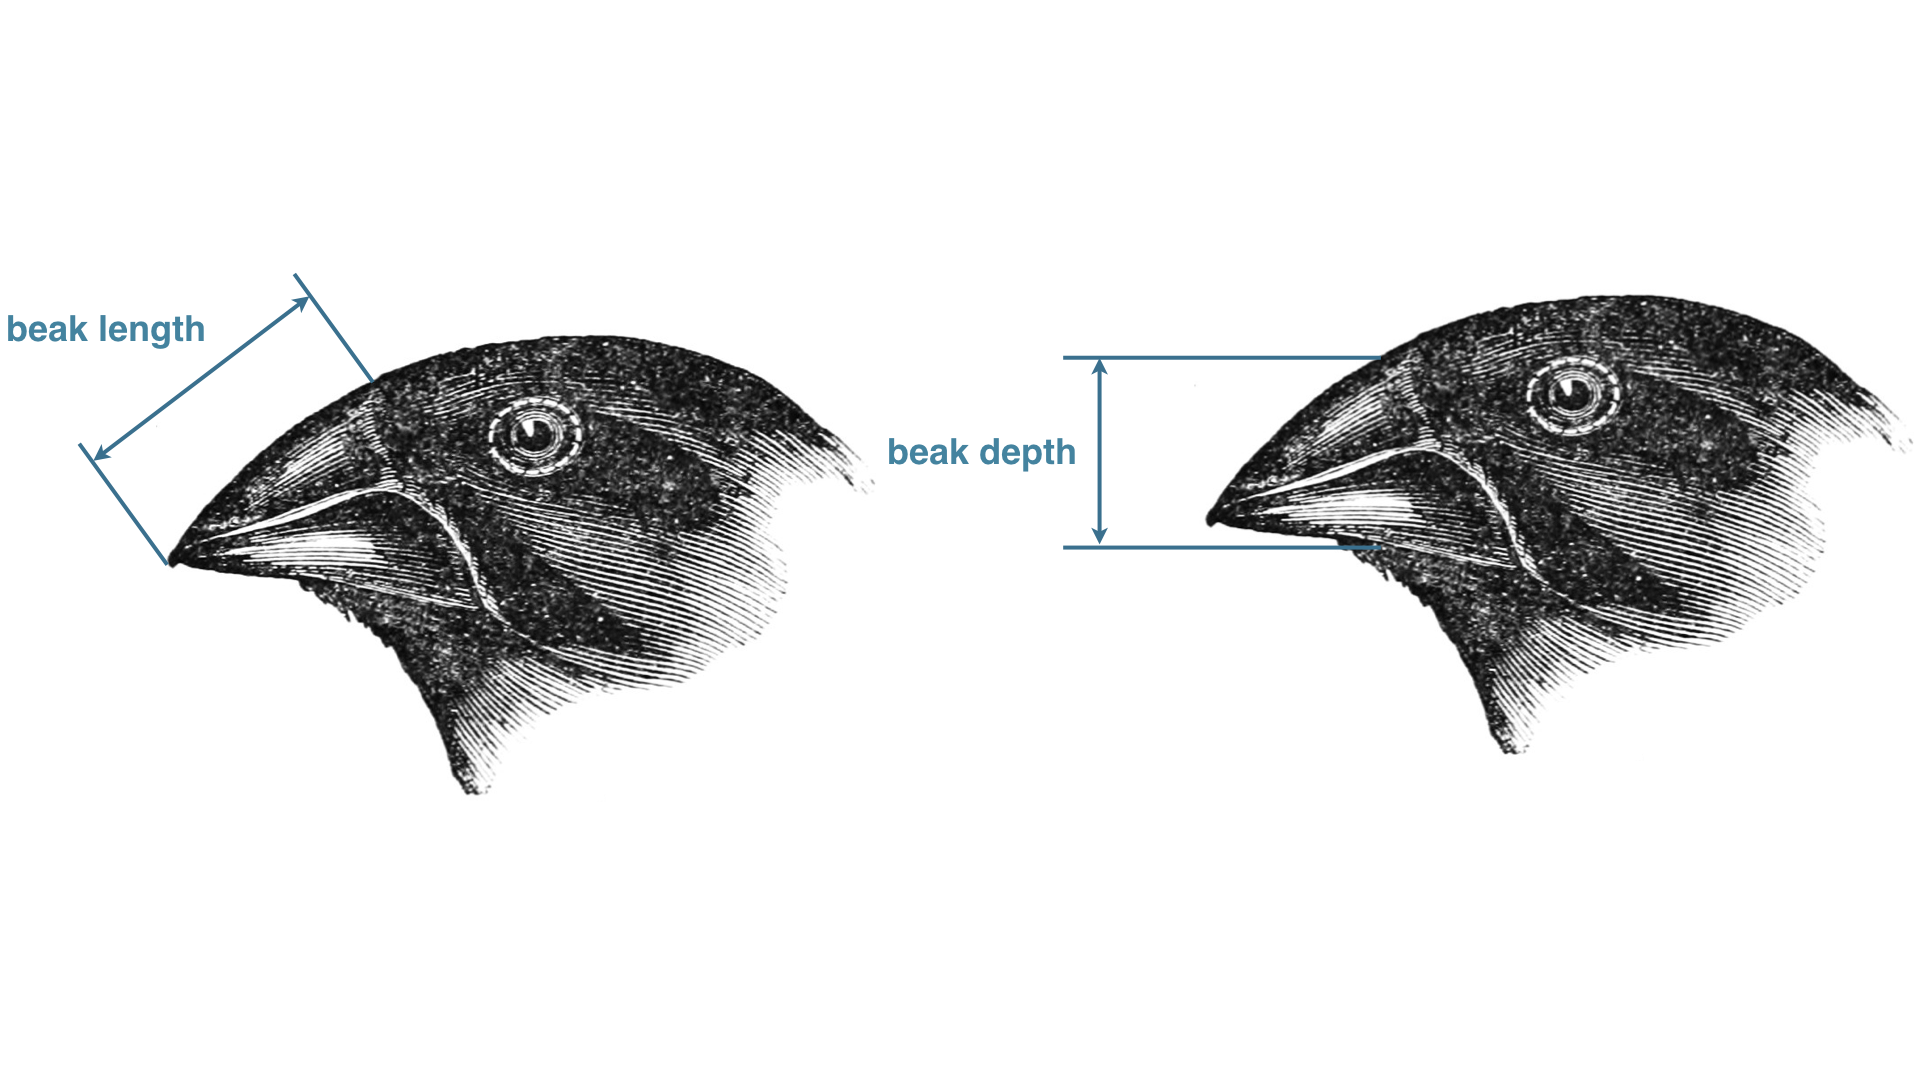

In [11]:
from IPython import display 
print("This image shows how the beak length and depth are measured - the EDA will focus on the beak depth (right side of the picture).")
display.Image("https://bebi103a.github.io/_images/finch_beak_diagram.png", height=500, width=500)

The EDA will not only focus on beak depth measurements but also on the fortis species only.

#### 2.2 Filtering the dataset for fortis species

In [12]:
df_fortis=df_2[df_2["species"]=="fortis"] #filter for fortis species only

In [13]:
df_fortis.describe() #look at the basic statistic details for fortis species

,index,band,beak_length,beak_depth,year
count,437.000000,437.000000,437.000000,437.000000,437.000000
mean,242.089245,6696.613272,10.551945,9.014851,1985.244851
std,158.426983,8960.464932,0.711748,0.777729,16.575017
min,0.000000,2.000000,8.700000,7.200000,1975.000000
25%,109.000000,528.000000,10.000000,8.400000,1975.000000
50%,218.000000,820.000000,10.500000,9.000000,1975.000000
75%,414.000000,19288.000000,11.000000,9.600000,2012.000000
max,523.000000,22000.000000,12.900000,11.100000,2012.000000


There are 437 measurements of the beak depth with a mean of 9.01mm. Standard deviation is 0.78 ranging from a minimum 7.2mm up to 11.1mm maximum beak_depth. 

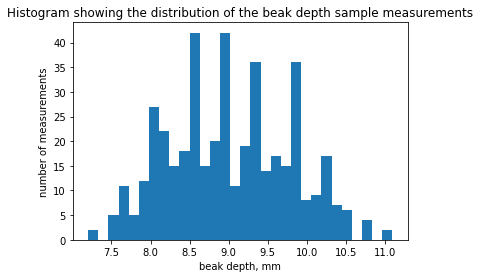

In [83]:
#visualise the beak_depth distribution
x_hist=df_fortis["beak_depth"]
plt.hist(x_hist, bins=30)
plt.title("Histogram showing the distribution of the beak depth sample measurements")
plt.xlabel("beak depth, mm")
plt.ylabel("number of measurements")
plt.show()

Looks like the beak depth is fairly spread with certain depths sharply standing out, not so close to the mean of 9.01mm.

In [15]:
spread=max(df_fortis["beak_depth"])-min(df_fortis["beak_depth"]) #calculating the range of beak depths
print("The range of beak depths is:", round(spread, 2), "mm")

The range of beak depths is: 3.9 mm


3.9mm range for a mean of 9.01mm does seem like a relatively large number. Given this is calculated across both 1975 and 2012, the following section will drill down into specifc years to see whether these cause aforementioned variation.

#### 2.3 Fortis beak depth 1975 vs 2012 measurements

Text(0.6, 0.8, '2012 seems to have a bigger variance')

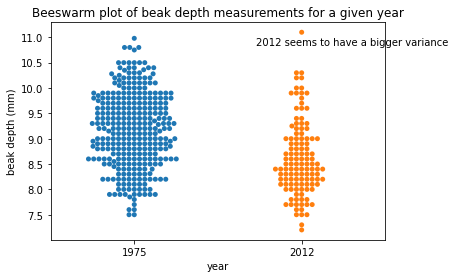

In [16]:
#create a beeswarm plot to visualise the difference of the fortis beak depths between 1975 and 2012
_=sns.swarmplot(x="year", y="beak_depth", data=df_fortis).set_title("Beeswarm plot of beak depth measurements for a given year")
_=plt.xlabel("year")
_=plt.ylabel("beak depth (mm)")
plt.figtext(0.6, 0.8, "2012 seems to have a bigger variance")

2012 clearly has a bigger varience, with values spread from under 7.5mm to over 11mm, with more values in the bottom half, suggesting the beaks have become less deep. Additionally, the 2012 plot looks much thinner, so we want to understand how many datapoints are actually fed into a given year.

#### 2.4 Number of data points

In [17]:
#filter by year (1975 or 2012) and by species (fortis or scandens)
def species_by_year_bd(df, year, species):
    """ returns array of required species for given year, beak_depth column only """
    df = df[(df["year"]== year) & (df["species"]==species)]
    return df["beak_depth"]

In [18]:
#extracting array for fortis species, year 1975
fortis_1975= species_by_year_bd(df_2, 1975, "fortis") 
#extracting array for fortis species, year 2012
fortis_2012 = species_by_year_bd(df_2, 2012, "fortis") 

In [19]:
#check the returned output
print(fortis_1975.head())
fortis_2012.head()

0    8.0
1    8.3
2    7.5
3    8.0
4    9.9
Name: beak_depth, dtype: float64


403    8.5
404    8.9
405    7.5
406    9.6
407    9.2
Name: beak_depth, dtype: float64

In [20]:
#count of sampled birds in 1975 and 2012
len_1975=len(fortis_1975)
len_2012=len(fortis_2012)
print(len_1975, "- the number of data points of fortis species in 1975.")
print(len_2012, "- the number of data points of fortis species in 2012.")

316 - the number of data points of fortis species in 1975.
121 - the number of data points of fortis species in 2012.


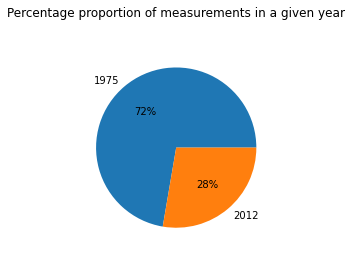

In [21]:
#visualise the proportion of measurements coming from each year in a pie chart
x_pie = [len_1975, len_2012]
labels = ["1975", "2012"]

fig, ax = plt.subplots()
ax.pie(x_pie, labels=labels, radius=0.8, autopct="%1.0F%%")
ax.set_title("Percentage proportion of measurements in a given year")
plt.tight_layout()

To confirm a thinner 2012 beeswarm chart, there are only 121 (28%) data points compared to 316 (72%) data points in 1975.

#### 2.5 ECDF (Empirical CumulativeDistribution Function)

As the last exercies of the EDA, we will run an ECDF (Empirical Cumulative Distribution Function) which will give us the probability that variable (beak_depth) will take a value less than or equal to specific value of the variable, in other words, visualise the percentile values of the beak depth measurements.

In [22]:
#define an ECDF
def ecdf(data):
    """ECDF will give us the probability that variable (beak_depth) will take a value less than or equal 
    to a specific value of the variable"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, n+1) / n
    return x, y

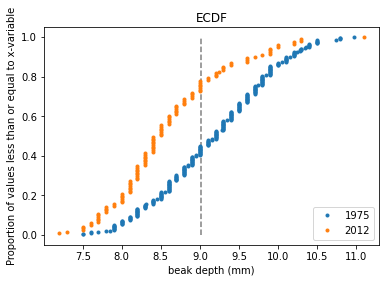

In [23]:
#compute and plot the ECDF of beak depths for fortis species
x_1975, y_1975 = ecdf(fortis_1975)
x_2012, y_2012 = ecdf(fortis_2012)

_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')
_ = plt.margins(0.05)

_ = plt.title('ECDF')
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('Proportion of values less than or equal to x-variable')
_ = plt.legend(('1975', '2012'), loc='lower right')
_ = plt.vlines(9.01, 0.0, 1.0, "grey", linestyles="dashed")

There is a distinct difference in the shape and length of both curves. 
    - As previously observed, 2012 range from and up to a more extreme minimum and maximum. 
    - On the other hand, 1975 measurements seem to be more evenly distributed across the range. 
    - Looking at the mean (grey dashed line), we see that around 40% measurements from 1975 fall under this value, while almost 80% of 2012 measurements have a mean of 9mm. On the opposite, 80% of beaks in 1975 would measure 10mm or below.
    - In fact there is a visible shift in the values between the given years, with 2012 on the left side presenting a higher percentage of values equal or less than a specific value in 1975: e.g. around 20% of beaks were 8.5mm deep in 1975; in 2012 around 20% are only 8mm deep.

Does that mean beaks have become shallower over time for fortis species?

### Part 3: From graphical results to statistical significance

We have observed a visual difference in the means of beak depths. Now let's check the difference in sample means for beak depth measurements in year 1975 and 2012 on a statistical level.

#### 3.1 Compute the exact difference between the means for 1975 and 2012

In [24]:
#beak depth means for 1975 and 2012, and difference of the sample means
bd_mean_1975=np.mean(fortis_1975)
bd_mean_2012=np.mean(fortis_2012)
print("1975 beak depth mean is:", round(bd_mean_1975,3), "mm")
print("2012 beak depth mean is:" , round(bd_mean_2012, 3), "mm")
mean_diff=np.mean(fortis_1975)-np.mean(fortis_2012)
print("Difference of means between 1975 and 2012 is", round(mean_diff, 3), "mm")

1975 beak depth mean is: 9.172 mm
2012 beak depth mean is: 8.605 mm
Difference of means between 1975 and 2012 is 0.566 mm


#### 3.2 Visualisation of the beak depth measurements for both years

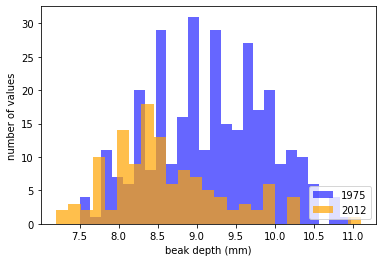

In [25]:
#histogram of the beak depth values from 1975 and 2012
_ = plt.hist(fortis_1975, bins=25, color='blue', alpha=0.6, density=False)
_ = plt.hist(fortis_2012, bins=25, color='orange', alpha=0.7, density=False)
    #density=True allows for normalisation; sets height of the bars so that total area of the historgram equals one and approximates probability density function
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel("number of values")
_ = plt.legend(('1975', '2012'), loc='lower right')
plt.show()

The above difference in means is only a representation of 437 data points, which are fragmented across the range. To visualise the mean difference more clearly, we want to simulate an environment where we can acquire data over and over again - approximating the true underlaying distribution. This can be achieved thorugh the process of bootstrapping.

#### 3.3 Bootstrapping - creating a function

As mentioned above, we only have a sample of the true population, so we will use the bootstrapping method to find the "true" value of the population parameters.
First, we will resample the data and compute a (single) summary statistic (mean in this case) of the resampled array. Then, we can simulate the process over and over again (n-number of times) to get an array of (multiple) mean bootstrap replicates and visualise and determine the shape of the distribution.

In [26]:
#create a function to genereate bootstrap replicate for 1-dimensional arrays
def bootstrap_replicate_func(data,func):
    """
    This function will generate bootstrap replicates* of a given array.
    First it will resample the array (np.random.choice) to create a bootstrap sample,
    second, it will compute a summaray statistic of choice a.k.a. bootstrap replicate
    *a single value of a statistic computed from a bootstrap sample
    
    parameters
    ---------------
    data: 1-dimensional array to draw out the samples
    len(data): specfiies the number of samples to take out of the array
    func: a summary statistic
    """
    bs_sample=np.random.choice(data, len(data))
    return func(bs_sample)

In [27]:
#generate a function to draw the bootstrap replicates n-number of times
def draw_bs_replicate(data, func, size=1):
    bs_replicates=np.empty(shape=size) #initialise an empty array to hold all the replicates
    for i in range(size): #create a for loop to generate a replicate "size" number of times
        bs_replicates[i]=bootstrap_replicate_func(data, func) #store the replicates in an array
    return bs_replicates

In [28]:
#compute bootstrap replicates of means for both years using the draw_bs_replicate function
bootstrap_replicates_1975=draw_bs_replicate(fortis_1975,np.mean, 10000)
bootstrap_replicates_2012=draw_bs_replicate(fortis_2012,np.mean, 10000)

#### 3.4 Confidence intervals for the difference in means from the bootstrapped replicates

In [29]:
#bootstrap replicates of the difference of means 
bootstrap_diff_means_replicates = bootstrap_replicates_1975 - bootstrap_replicates_2012

In [30]:
ci_bs_diff=np.percentile(bootstrap_diff_means_replicates, [2.5,97.5])
print("95% confidence interval for difference of means is:",ci_bs_diff)

95% confidence interval for difference of means is: [0.41077897 0.718444  ]


The above confidence intervals account for the uncertainty of the paramteres estimation, but we are 95% confident that the difference of true means falls somewhere between 0.41 and 0.72 mm.

#### 3.5 Histogram of mean bootstrap replicates

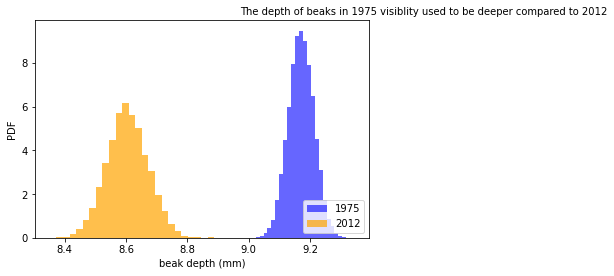

In [31]:
#histogram of the mean bootstrap replicates (repeated measurements of the mean) from 1975 and 2012
_ = plt.hist(bootstrap_replicates_1975, bins=25, color='blue', alpha=0.6, density=True)
_ = plt.hist(bootstrap_replicates_2012, bins=25, color='orange', alpha=0.7, density=True)
    #density=True allows for normalisation; sets height of the bars so that total area of the historgram equals one and approximates probability density function
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('PDF')
_ = plt.legend(('1975', '2012'), loc='lower right')
plt.figtext(0.6, 0.9, "The depth of beaks in 1975 visiblity used to be deeper compared to 2012")
plt.show()


The above computes the approximate Probability Density Function of the means of beak depths we would expect if we repeated the measurements infinite number of times (1000x). The difference in means is staying the same, but because we normalised the probability (setting density=True) the y-axis is on the same scale and we see much clearly the distinction in the difference of means between year of 1975 and 2012 as well as the fact that distributions are normal.

How confident are we that the observations are true though?
Let's  look at the confidence intervals to provide with a range within which our true test statistics fall. 

#### 3.6 Confidence intervals for the boostrap replicates of the means

In [32]:
#calculate bootstrap confidence intervals for the means of both years
ci_fortis_1975=np.percentile(bootstrap_replicates_1975, [2.5,97.5])
ci_fortis_2012=np.percentile(bootstrap_replicates_2012, [2.5,97.5])
print("95% confidence interval for 1975 mean is:", ci_fortis_1975)
print("95% confidence interval for 2012 mean is:", ci_fortis_2012)

95% confidence interval for 1975 mean is: [9.08971282 9.2521519 ]
95% confidence interval for 2012 mean is: [8.47520661 8.73636364]


The above ranges of the confidence intervals are commensurate with the values on the histogram, so 95% of observed values lie within the 95% confidence interval. In other words, repeating the measurements, we can expect 95% of the values to fall within the given range. With the normalisation, both distribution of the bootstrap replicates of the mean are Normal.

Based on the ECDF, histogram plots and confidence intervals, it's rather obivous that Fortis beaks have become shallower. Yet, it is possible this is all due to random chance? As such, we want to measure the probability of getting the observed difference in means if they were exactly the same and test the hypothesis.

**3.7 Hypothesis testing**
- H0: Fortis species beaks are of equal depth in 1975 and 2012 (1975 mean = 2012 mean)
- H1: Fortis species beaks have become shallower from 1975 to 2012 (1975 mean > 2012 mean)

Below calucations will test the hypothesis and determine whether the measurements are just due to a random chance or not.

#### 3.8 Option 1: two sample t-test

In [85]:
#find varience for each array (1975 vs 2012) of the sample measurements
print(np.var(fortis_1975), np.var(fortis_2012))

0.5419738743791054 0.5322232087972139


In [86]:
#calculate the ratio between the two variances
print(0.54197/0.5322)

1.018357760240511


As variance ratios is below 4, we can assume that population variances are equal. (ref: https://www.statology.org/two-sample-t-test-python/#:~:text=%20How%20to%20Conduct%20a%20Two%20Sample%20T-Test,3%20Step%203%3A%20Interpret%20the%20results.%20More%20)

In [35]:
import scipy.stats as stats

In [36]:
#run a 2 sample t-teest with equal variances for original data
stats.ttest_ind(a=fortis_1975, b=fortis_2012, equal_var=True)

Ttest_indResult(statistic=7.196495054344143, pvalue=2.727142579713897e-12)

The p-value is well below zero, which means there is statistically significant difference between the two means and we can reject the null hypothesis that there is no difference. 

#### 3.9 Option two: Bootstrap hypothesis testing

In [84]:
#mean of combined datasets
combined_mean=np.mean(np.concatenate((fortis_1975, fortis_2012)))
print("combined mean is:", round(combined_mean, 2))

combined mean is: 9.01


In [39]:
#shift the sample means to be equal to the combined mean from above
fortis_1975_shifted= fortis_1975 - np.mean(fortis_1975) + combined_mean
fortis_2012_shifted= fortis_2012 - np.mean(fortis_2012) + combined_mean

#print to display how the values have become similar across both years
print(fortis_1975_shifted)
print(fortis_2012_shifted)

0       7.843206
1       8.143206
2       7.343206
3       7.843206
4       9.743206
         ...    
311     8.293206
312     8.693206
313    10.093206
314     9.593206
315     8.793206
Name: beak_depth, Length: 316, dtype: float64
403     8.909479
404     9.309479
405     7.909479
406    10.009479
407     9.609479
         ...    
519     8.209479
520     8.909479
521     8.609479
522     9.609479
523     9.409479
Name: beak_depth, Length: 121, dtype: float64


In [40]:
#take 10,000 bootstrap replicates of the mean from shifted data 
bs_replicates_1975 = draw_bs_replicate(fortis_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_replicate(fortis_2012_shifted, np.mean, 10000)

In [41]:
#samples of difference of means of bootstrap replicatess
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

What is the probability of obtaining a value of our test statistic that is at least as extreme as what was observed under the assumption the null hypothsis is true?

In [42]:
#computing the p-value 
p=np.sum(bs_diff_replicates >= combined_mean) / len(bs_diff_replicates)

In [43]:
print("p-value is ", p, " which tells us there is " , p, "probability that we would get the observed mean difference in beak depth if the means were the same ")

p-value is  0.0  which tells us there is  0.0 probability that we would get the observed mean difference in beak depth if the means were the same 


#### 10. Rejecting the null hypothesis

With p value at 0.0, the data is statistically signiciantly different than what we would observe if the null hypothesis was true.

Following the calculations, we can reject the H0 (null hypothesis) that the beaks are of equal depth as there is no chance to see the difference between bootstrapped means from the two samples being greater than the combined mean itself, meaning the two means are statistically significant and H1 is true.

#### 11. Boxplot visualisation of the difference in means

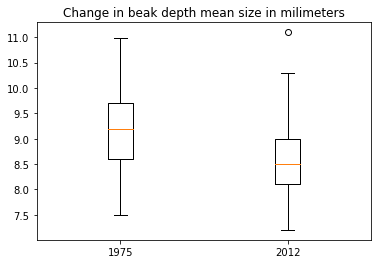

In [44]:
#create a boxplot to visualise the difference in mean
boxplot_data=[fortis_1975, fortis_2012]
_=plt.boxplot(boxplot_data, labels=["1975", "2012"])
plt.title("Change in beak depth mean size in milimeters")
plt.show()

The question that arises, is why did the changes happen? Why are there less measurements in first place?
One potential reason to the second question is the 1977 drought, which reduced supply of seeds on the Galapgos islands and forces Finches to deal with harder and bigger seeds they used to eat before. Those that adapted - survived, those who didn't - died, hence the smaller sample populatioin.
If that was the case, is it only beak depth that has changed, or has beak length changed proportionally. Part 4 will look at the beak shape changes over time.

### Part 4: EDA of beak shape changes over time (depth and length)

We already have the arrays for fortis species beak depth. In order to compare it with beak length, we also need to create an array of fortis species beak length for 1975 and 2012. For that, the species_by_year function, creat will be modified to return beak_length rather than beak_depth.

In [45]:
#filter by year (1975 or 2012) and by species (fortis or scandens), returning beak_length array
def species_by_year_bl(df, year, species):
    """ returns array of required species for given year """
    df = df[(df["year"]== year) & (df["species"]==species)]
    return df["beak_length"]

In [46]:
#create beak length arrays from pre-existing species_by_year_bl
fortis_1975_bl=species_by_year_bl(df_2, 1975, "fortis")
fortis_2012_bl=species_by_year_bl(df_2, 2012, "fortis")

#### 4.1 Scatter plotting to examine the relationship between two numerical variables

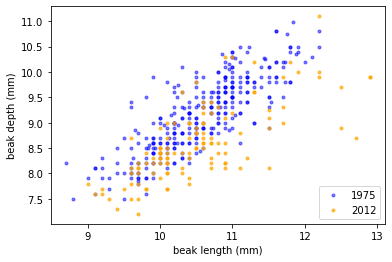

In [47]:
#scatter plot of 1975 and 2012 beak depth and beak length
_ = plt.scatter(fortis_1975_bl, fortis_1975, marker='.', linestyle='None', color="blue", alpha=0.5)
_ = plt.scatter(fortis_2012_bl, fortis_2012, marker='.', linestyle='None', color="orange", alpha=0.7)
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='lower right')

Looks like the shift only happened in the beak_depth dimension, but not much in the beak_length. 

Let's examine the relationship for the finch **scandens** species as well.

In [62]:
#looking at the scandens species
scandens_1975_bl=species_by_year_bl(df_2, 1975, "scandens")
scandens_2012_bl=species_by_year_bl(df_2, 2012, "scandens")
scandens_1975_bd=species_by_year_bd(df_2, 1975, "scandens")
scandens_2012_bd=species_by_year_bd(df_2, 2012, "scandens")

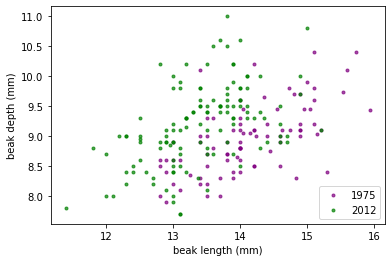

In [49]:
#scatter plot of 1975 and 2012 beak depth and beak length for scandens specias
_ = plt.scatter(scandens_1975_bl, scandens_1975_bd, marker='.', linestyle='None', color="purple", alpha=0.7)
_ = plt.scatter(scandens_2012_bl, scandens_2012_bd, marker='.', linestyle='None', color="green", alpha=0.7)
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='lower right')

For scandens, the shift is mostly in beaks getting deeper, but not longer, while for fortis species it's the opposite, beaks getting shallower while not getting longer.

#### 4.2 Pearson Correlation

To quantify the relationship between beak depth and length, we can use Perason Correlation coefficient as a measure of linear association. 

In [66]:
#correlation of beak depth and lenght for the years of 1975 and 2012
fortis1975_corr=np.corrcoef(fortis_1975, fortis_1975_bl)[0,1]
fortis2012_corr=np.corrcoef(fortis_2012, fortis_2012_bl)[0,1]

In [72]:
print("1975 correlation coefficient for fortis species:", round(fortis1975_corr,2))
print("2012 correlation coefficient for fortis species:", round(fortis2012_corr,2))

1975 correlation coefficient for fortis species: 0.82
2012 correlation coefficient for fortis species: 0.72


Seems like the correlation between beak depth and length of fortis species has become weaker from 1975 to 2012, going from 0.82 down to 0.72 respectively. 

In [76]:
#correlation of beak depth and lenght for the years of 1975 and 2012
scandens1975_corr=np.corrcoef(scandens_1975_bd, scandens_1975_bl)[0,1]
scandens2012_corr=np.corrcoef(scandens_2012_bd, scandens_2012_bl)[0,1]

In [77]:
print("1975 correlation coefficient for scandens species:", round(scandens1975_corr,2))
print("2012 correlation coefficient for scandens species:", round(scandens2012_corr,2))

1975 correlation coefficient for scandens species: 0.62
2012 correlation coefficient for scandens species: 0.5


Similarly to fortis species, correlation between the beak length and beak has also become weaker for scandens species.

Both correlation coefficients confirm the above observation from the scatter plot - there is a clear positive correlation between the two variables (beak depth and length, i.e: increasing the value of one, will increase the value of the other), yet going from 1975 to 2012, this correlation has become weaker, just like the dots on the plot - a noticable shift in the beak depth, while the beak length remained nearly the same, reducing the correlation in 2012.

#### 4.3 Regression analysis

Given the positive correlation between the two variables, we want to understand and measure the affect of one variable on the other. From the two variables, beak depth can be treated as a response variable and beak length as a predictor. As such, we can make an assumption that the functional form is approximately linear, so choosing linear regression will allow us to find the coefficient estimates such that the liner model will fit the available data well for the function: Y=β0+β1X1. In other words, finding an intercept (β0) and a slope (β1) such that the resulting line is as close to our data points (beak depth and length measurements) as possible. Python np.polyfit function will be used to define the least square coefficient estimates (β0 and β1) so as to minimise the RSS (Residual Sum of Squares).

In [50]:
#liner regression paramteres - getting the slope and the intercept for each year's data
slope_1975, intercept_1975 = np.polyfit(fortis_1975_bl, fortis_1975, 1)
slope_2012, intercept_2012 = np.polyfit(fortis_2012_bl, fortis_2012, 1)

In [78]:
#display the values of 1975 and 2012 coefficients (intercept and slope)
print("1975 intercept:", intercept_1975)
print("1975 slope:", slope_1975)

print("2012 intercept:", intercept_2012)
print("2012 slope:", slope_2012)


1975 intercept: -0.3443658558703562
1975 slope: 0.9006947853756163
2012 intercept: 1.7048922681326453
2012 slope: 0.6561040669149377


What slope tells us is that for every additionally milimeter in beak length, the beak depth will be 0.9mm larger  in 1975, yet in 2012 only 0.65 larger. 
This confirms back the earlier observations, showing how much  the beak depth has changed in comparison to beak length.

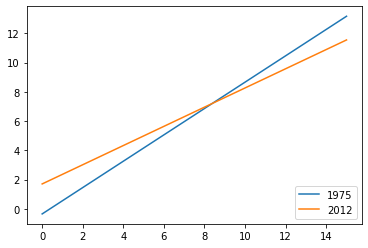

In [79]:
#plotting the linear regression to visualise the slop and the intercept of both years
x=np.array([0,15])
y1975=slope_1975 * x + intercept_1975
y2012=slope_2012 * x + intercept_2012
_=plt.plot(x, y1975)
_=plt.plot(x, y2012)
_ = plt.legend(('1975', '2012'), loc='lower right')

As displayed by the numerical values of intercept and slope, we can see that 1975 slope with a value of β1=0.90 is steeper than 2012 with β1=0.66.

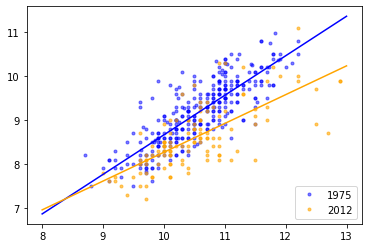

In [53]:
#liner regression plot lines overlayed with the actual data
_ = plt.plot(fortis_1975_bl, fortis_1975, marker='.', linestyle='None', color="blue", alpha=0.5)
_ = plt.plot(fortis_2012_bl, fortis_2012, marker='.', linestyle='None', color="orange", alpha=0.6)
x=np.array([8,13])
y1975=slope_1975 * x + intercept_1975
y2012=slope_2012 * x + intercept_2012
_=plt.plot(x, y1975,color="blue")
_=plt.plot(x, y2012, color="orange")
_ = plt.legend(('1975', '2012'), loc='lower right')


Merging both the scatter plot with the least sum of squares line so see how the values have truly shifted downwards - less steep slope with lower values of beak depth in 2012.

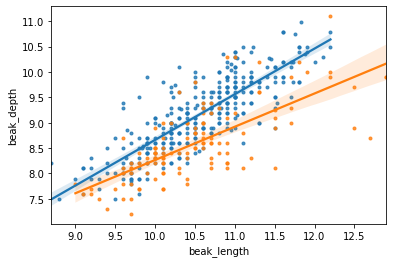

In [109]:
#plotting with confidence intervals, using seaborn library
_=sns.regplot(x=fortis_1975_bl, y=fortis_1975, ci=95, marker=".")
_=sns.regplot(x=fortis_2012_bl, y=fortis_2012, ci=95, marker=".")

Dispaying the regression with the confiedence intervals we see the orange shade widening on the right-hand side, with some measurements lying far from the regression line, while the blue line seems to provide a more accurate fit.

#### 4.4 Ratio of beak length to depth

Given we have observed a difference in correlation for 1975 and 2012, we want to understand the exact difference in the proporation change of beak length vs depth.

In [90]:
#compute and print length-to-depth ratios
ratio_1975 = fortis_1975 / fortis_1975_bl
ratio_2012 = fortis_2012/ fortis_2012_bl

In [91]:
#compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)
print("1975 ratio is:", mean_ratio_1975)
print("2012 ratio is:", mean_ratio_2012)

1975 ratio is: 0.8679659673104045
2012 ratio is: 0.8190467768325987


The ratio between beak depth vs length has indeed decreased.
As before, we want to find a confidence interval where the true proportion change lies thorugh the process of bootstrapping.

In [92]:
#generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_replicate(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_replicate(ratio_2012, np.mean, size=10000)

In [93]:
#compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

In [95]:
#print the results
print('1975 ratio confidence interval =', conf_int_1975)
print("2012 ratio confidence intervals =", conf_int_2012)

1975 ratio confidence interval = [0.86231245 0.8739469 ]
2012 ratio confidence intervals = [0.80820007 0.83013605]


In [97]:
#print the difference in 99% confidence intervals of the ratios
ci_difference=conf_int_1975-conf_int_2012
print(ci_difference)

[0.05411237 0.04381085]


Following the bootstrapping, we are 99% confident that the difference in ratios falls somewhere between 0.054 and 0.043.

#### 4.5 Covariance between the beak depth and lenght

In [108]:
#the change of one variable in proportion to the other can also be computed using the covariance
covariance_1975=np.cov(fortis_1975, fortis_1975_bl)[0][1]
covariance_2012=np.cov(fortis_2012, fortis_2012_bl)[0][1]
print("1975 covariance:", covariance_1975)
print("2012 covariance:", covariance_2012)

1975 covariance: 0.40710571830419934
2012 covariance: 0.428072658402204


Since covariance tells us how much does one variable change if another one changes, the increased covariance between 1975 and 2012 confirms increased change in proportion of beak depth vs length.

### 5 Summary

This exercise has looked into Finch birds beak size changes over time (from 1975 to 2012), focusing mostly on the beak depth of Finch fortis species.
While less data is available for 2012, through the process of bootstrapping we are nearly 100% confident to confirm that beak depth has decreased over time. This has also impacted the change in shape of the overall beak size, where the beak length has not changed in the same proportion as the beak depth. 

More information would be required to investigate the exact cause of this change, assess the impact of it, predict possible consequences and determine any required actions to tackle potential issues presented to Finch birds species.